Differential Evolution (DE) algorithm is an algorithm, invented by R. Storn and K. Price in 1997, is a very powerful algorithm for black-box optimization (also called derivative-free optimization). Black-box optimization is about finding the minimum of a function $f(x):\real^n \rightarrow \real$
, where we don’t know its analytical form, and therefore no derivatives can be computed to minimize it (or are hard to approximate).

In this way, in Differential Evolution, solutions are represented as populations of individuals (or vectors), where each individual is represented by a set of real numbers. These real numbers are the values of the parameters of the function that we want to minimize, and this function measures how good an individual is. The main steps of the algorithm are: 
- initialization of the population; 
- mutation; 
- recombination; 
- replacement and evaluation. 
Let’s see how these operations are applied working through a simple example of minimizing the function

$f(X) = \sum{\frac{x_i^2}{2}}\;for\;n=4,\;so\;X=\{x_1,x_2,x_3,x_4\},\;and\;-5 \leq x_i \leq 5$

In [305]:
import numpy as np
from numpy import argmin, min, around, clip
from icecream import ic
from matplotlib import pyplot

In [238]:
# bounds
lower_bound = -5
upper_boud = 5

# population size
dimension = 2

# Function objective
def fobj(x):
    value = 0
    for i in range(len(x)):
        value += x[i]**2
    return value/len(x)

# Sphere Function objective
def sphere_fobj(x):    
    return x[0]**2.0 + x[1]**2.0

bounds = [(lower_bound, upper_boud)] * dimension

In [244]:
# First step
# Initialization
# Population of 10 individual, 4 params each (population_size=10)
population_size = 100
#population = np.random.uniform(size=(population_size,dimension), low=lower_bound, high=upper_boud)

population = np.random.uniform(size=(population_size,dimension), low=lower_bound, high=upper_boud)
population_all = list()
score_iter = list()
score_all = list()
for ind in population:
    score_all.append(sphere_fobj(ind))

# The first best vector
target = population[argmin(score_all)] 
prev_score = min(score_all)

# Mutation & Recombination
# Select three vectors, a, b and c
# Index of target vector
iterations = 100
j = 0
mut = 0.5
crossp = 0.70
scores_list = list()
for i in range(iterations):
    for j in range(population_size):
        idxs = [idx for idx in range(population_size) if idx != j]
        #print('idxs:', idxs)
        
        # Select 3 vectors, without replacement
        selected = np.random.choice(idxs, 3, replace=False)    
        a, b, c = population[selected]

        # Mutation

        # Constant called mutation factor    
        mutant = a + mut * (b - c)
        mutant = np.clip(mutant, lower_bound, upper_boud)
        #print('mutant:',mutant)

        # Probability if that number will be replaced or not by the one in the mutant at the same positions    
        cross_points = np.random.uniform(size=(dimension), low=lower_bound, high=upper_boud) < crossp        

        # Crossover
        trial = np.where(cross_points, mutant, population[j])
        
        actual_fit = score_all[j]
        fit_trial = sphere_fobj(trial)
        if fit_trial < actual_fit:
            population[j] = trial
            score_all[j] = fit_trial
            
    best_score = min(score_all)
    if best_score < prev_score:
        target = population[argmin(score_all)]
        prev_score = best_score
        score_iter.append(best_score)
        print('Iteration: %d f([%s]) = %.5f'%(i, around(target, decimals=5), best_score))

Iteration: 6 f([[-0.02166  0.00538]]) = 0.00050
Iteration: 14 f([[ 0.00795 -0.01054]]) = 0.00017
Iteration: 16 f([[-0.00231 -0.01054]]) = 0.00012
Iteration: 17 f([[ 0.00451 -0.00313]]) = 0.00003
Iteration: 19 f([[-0.00189 -0.00092]]) = 0.00000
Iteration: 23 f([[-1.36e-03 -5.00e-05]]) = 0.00000
Iteration: 24 f([[ 0.00052 -0.00111]]) = 0.00000
Iteration: 27 f([[-0.00054 -0.00057]]) = 0.00000
Iteration: 28 f([[ 1.0e-05 -4.6e-04]]) = 0.00000
Iteration: 31 f([[ 1.0e-05 -2.1e-04]]) = 0.00000
Iteration: 34 f([[9.0e-05 1.5e-04]]) = 0.00000
Iteration: 35 f([[7.0e-05 1.6e-04]]) = 0.00000
Iteration: 37 f([[-1.2e-04 -1.0e-05]]) = 0.00000
Iteration: 38 f([[ 1.e-04 -1.e-05]]) = 0.00000
Iteration: 39 f([[-6.e-05 -2.e-05]]) = 0.00000
Iteration: 41 f([[4.e-05 4.e-05]]) = 0.00000
Iteration: 43 f([[-2.e-05 -3.e-05]]) = 0.00000
Iteration: 44 f([[2.e-05 0.e+00]]) = 0.00000
Iteration: 46 f([[ 2.e-05 -1.e-05]]) = 0.00000
Iteration: 49 f([[1.e-05 1.e-05]]) = 0.00000
Iteration: 50 f([[ 0.e+00 -1.e-05]]) = 0.00

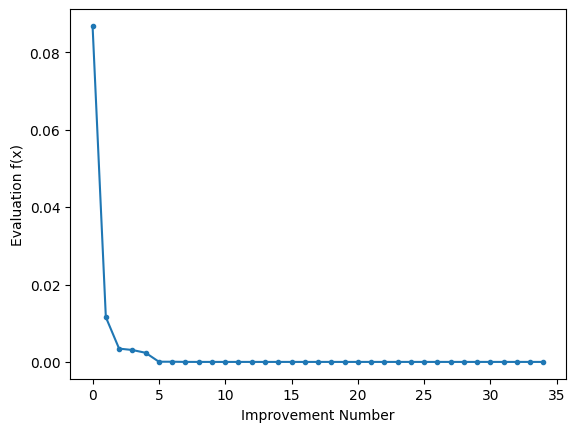

In [243]:
from matplotlib import pyplot

# line plot of best objective function values
pyplot.plot(score_iter, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

In [355]:
# Class DE
class differentialEvolution:
    """
    A class Differential Evolution Algorithm

    ...

    Attributes
    ----------
    population_size : int
        population size
    dimension  : int
        the dimension of population
    lower_bound : int
        lower bound of objective function, array of integer
    upper_bound : int
        upper bound of objective function, array of integer
    iterarions : int
        number of iterations
    cr : number
        crossver rate
    F : number
        mutant factor of multiplication
    print_graph_fit : boolean, default=False
            if you whant print the fit graph

    Methods
    -------
    says(sound=None)
        Prints the animals name and what sound it makes
    """

    def __init__(self, population_size, dimension, lower_bound, upper_bound, iterations, cr, F, print_graph_fit, random_seed):
        """
        Parameters
        ----------
        population_size : int
            the population size
        dimension  : int
            the dimension of population
        lower_bound : int
            lower bound of objective function, array of integer
        upper_bound : int
            upper bound of objective function, array of integer
        iterarions : int
            number of iterations
        cr : number
            crossver rate
        F : number
            mutant factor of multiplication
        print_graph_fit : boolean
            if you whant print the curve fitting.
        random_seed : int
            if 0 do not nothing, otherwise set seed
        """

        self.population_size = population_size
        self.dimension = dimension
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.iterations = iterations
        self.cr = cr
        self.F = F
        self.print_graph_fit = print_graph_fit

        if random_seed > 0:
            np.random.seed(random_seed)

        self.population = np.random.uniform(size=(population_size,dimension), low=lower_bound, high=upper_boud)
        self.bounds = [(lower_bound, upper_boud)] * dimension

        self.score_iter = list()
        self.score_all = list()
        for ind in self.population:
            self.score_all.append(fobj(ind))

        self.target = population[argmin(self.score_all)] 
        self.prev_score = min(self.score_all)
        self.best_score = np.inf

    # Objective Function
    def fobj(self, x):
        """The objetive function of sphere.

        Parameters
        ----------
        x : array of numbers
            Indexes of three vectors selected as candidates

        """

        return x[0]**2.0 + x[1]**2.0
    

    def selection(self, idxs):
        """The first step of the algorithm iteration performs a mutation process. 
        For this purpose, three random candidates, a, b and c, that are not the current one, are randomly selected from the population 
        and a mutated vector is generated by computing: $a + F * (b – c)$.

        Parameters
        ----------
        idxs : array of int
            Indexes of three vectors selected as candidates

        """

        selected = np.random.choice(idxs, 3, replace=False)    
        a, b, c = self.population[selected]
        
        return a, b, c

    def mutant(self, a, b, c):
        """The mutation process adds the weighted difference between two population vectors to a third vector, to produce a mutated vector. 
        The parameters of the mutated vector are again mixed with the parameters of another predetermined vector, the target vector, 
        during a process known as crossover that aims to increase the diversity of the perturbed parameter vectors. The resulting vector is known as the trial vector.

        Parameters
        ----------
        a : array of number
            The first vector
        b : array of number
            The second vector
        c : array of number
            The third vector

        """

        # Constant called mutation factor    
        mutant = a + self.F * (b - c)
        mutant = np.clip(mutant, lower_bound, upper_boud)

        return mutant

    def crossover(self, mutant_candidate, candidate):

        """For each position, we decide (with some probability defined by cr if that number will be replaced or not by the one in the mutant at the same position. 
        To generate the crossover points, we just need to generate uniform random values between bound and check if the values are less than cr. 
        This method is called binomial crossover since the number of selected locations follows a binomial distribution..

        Parameters
        ----------
        a : array of number
            The first vector
        b : array of number
            The second vector
        c : array of number
            The third vector

        """

        # Probability if that number will be replaced or not by the one in the mutant at the same positions    
        cross_points = np.random.uniform(size=(self.dimension), low=self.lower_bound, high=self.upper_bound) < self.cr

        # Crossover
        trial = np.where(cross_points, mutant_candidate, candidate)

        return trial

    def getScores(self):
        return self.score_iter

    def getBestScore(self):
        return self.best_score

    def printFit(self):
        """Print curve fitting.

        """

        pyplot.plot(self.getScores(), '.-')
        pyplot.xlabel('Improvement Number')
        pyplot.ylabel('Evaluation f(x)')
        pyplot.show()

    def executeDE(self):
        j = 0
        for i in range(self.iterations):
            for j in range(self.population_size):
                idxs = [idx for idx in range(self.population_size) if idx != j]
                
                # Selection 
                a, b, c = self.selection(idxs)                
                # Mutation
                mutant_candidate = self.mutant(a, b, c)
                # Crossover
                trial = self.crossover(mutant_candidate, self.population[j])
                # Evaluation
                actual_fit = self.score_all[j]
                fit_trial = fobj(trial)
                if fit_trial < actual_fit:
                    self.population[j] = trial
                    self.score_all[j] = fit_trial
                    
            self.best_score = min(self.score_all)
            if best_score < self.prev_score:
                target = self.population[argmin(self.score_all)]
                self.prev_score = self.best_score
                self.score_iter.append(self.best_score)
                #print('Iteration: %d f([%s]) = %.5f'%(i, around(self.target, decimals=5), best_score))
                
        if self.print_graph_fit:
            pyplot.plot(self.getScores(), '.-')
            pyplot.xlabel('Improvement Number')
            pyplot.ylabel('Evaluation f(x)')
            pyplot.show()



In [356]:
#population_size, dimension, lower_bound, upper_bound, iterations, cr, F
de = differentialEvolution(population_size=10, dimension=2, lower_bound=-5, upper_bound=5, iterations=100, cr=0.7, F=0.5, print_graph_fit=False, random_seed=10)
de.executeDE()

TypeError: 'int' object is not callable

In [354]:
de.getBestScore()

0.0019253861240797598